Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;

данные о видео из трендов YouTube;

данные об уровне счастья в разных странах;

данные по фильмам и сериалам Netflix.

In [15]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv('Pokemon.csv')
df = df.dropna()
df.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


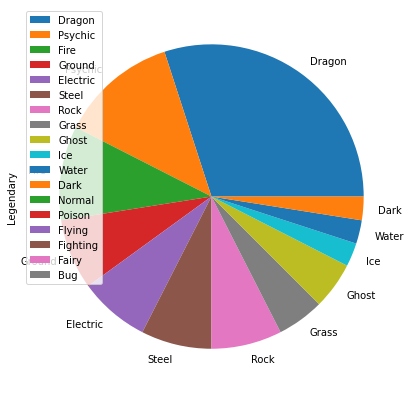

In [45]:
Legendary_class_dynamics = df.groupby(['Type 1']).sum().sort_values(by='Legendary', ascending=False)
# name_dynamics
Legendary_class_dynamics.plot(kind='pie', y='Legendary')

Данная круговая диаграмма показывает классификацию легендарных покемонов.  Видно что самую большую долю занимают покемоны класса дракон. Среди преимуществ круговой диаграммы то, что она дает мгновенное представление о соотношении значений, но чем больше секторов, тем сложнее ее читать. Могут возникнуть проблемы при анализе.

In [65]:
top_class_df = df.groupby('Type 1')[['Total']].sum()\
    .sort_values('Total', ascending=False).head(10)
    
top_class_df.style.bar()

,Total
Type 1,
Water,23800
Bug,21221
Rock,16280
Grass,16162
Normal,14455
Dragon,13070
Fire,12278
Steel,10698
Ghost,9770


Данная столбчатая диаграмма показывает, что суммарный боевой класс больше у водных покемонов. Диаграмма выстраивает суммарный БК в порядке убывания. 

Text(0, 0.5, 'Pokemons')

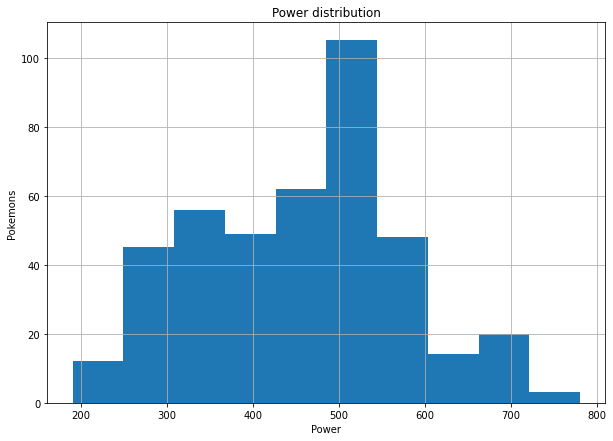

In [36]:
ax = df.Total.hist()
ax.set_title('Power distribution')
ax.set_xlabel('Power')
ax.set_ylabel('Pokemons')

На данной столбчатой диаграмме можно увидеть, что в основном покемоны имеют боевой класс 500. Столбчатые диаграммы очень хороши для большого количества данных, плюс в их в том, что при виде их сразу все понятно, то есть они просты в чтении. 

In [48]:
import seaborn as sns


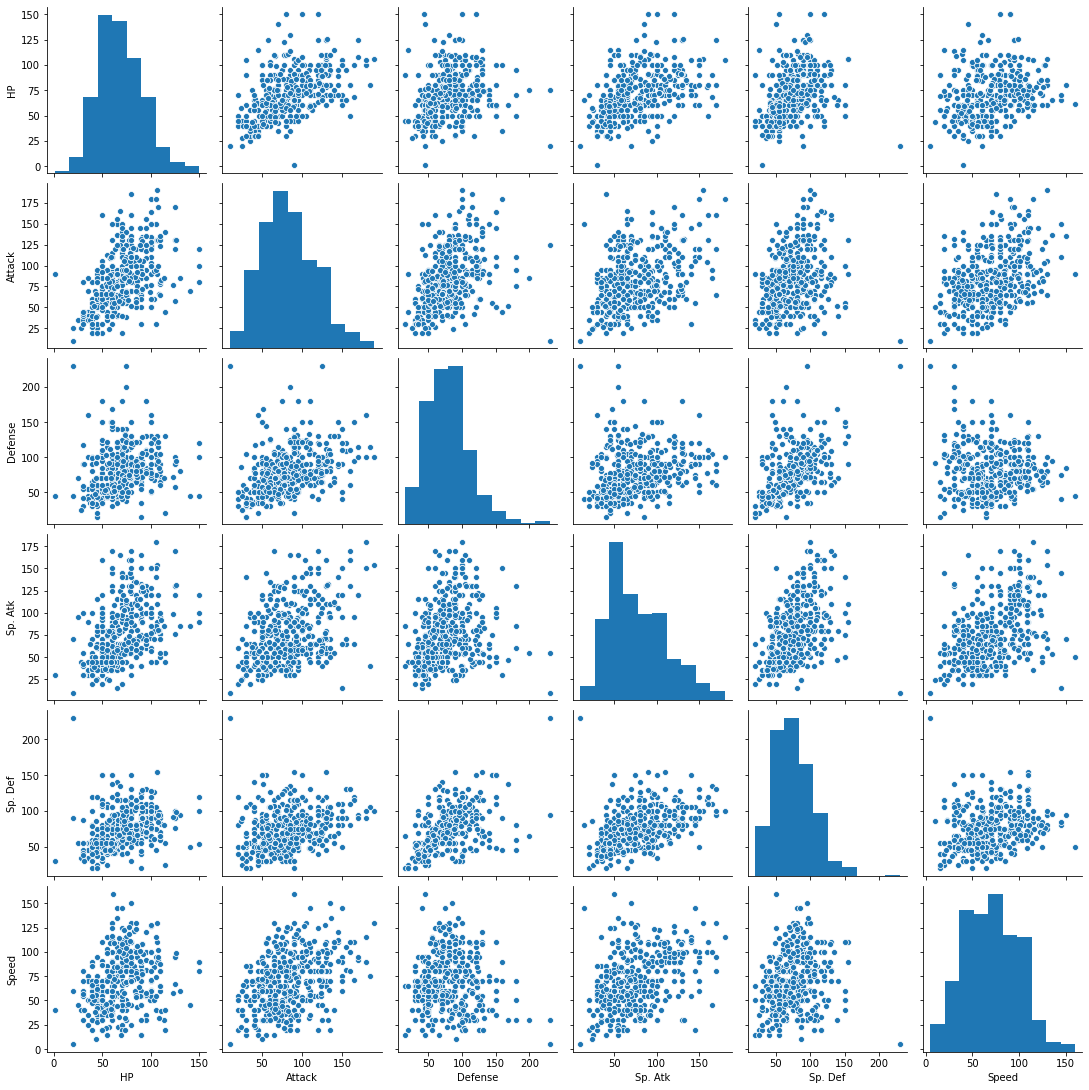

In [49]:
sns_plot = sns.pairplot(
    df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
sns_plot

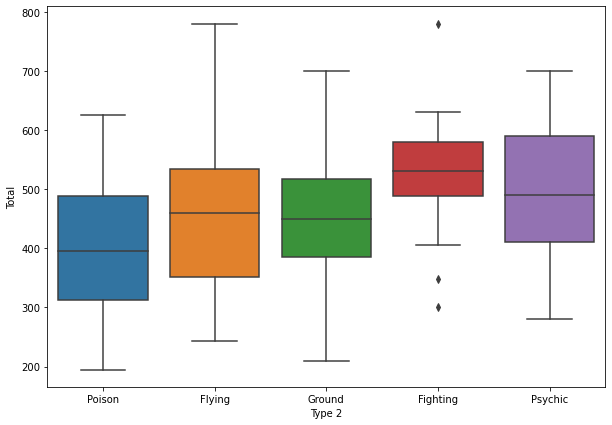

In [76]:
Pokemon_type = df['Type 2'].value_counts().sort_values(ascending = False).head(5).index.values
ax = sns.boxplot(x="Type 2", y="Total", 
            data=df[df['Type 2'].isin(Pokemon_type)])

Тут мы видим разброс боевого класса покемонов разных типов. Точками на графике обозначаются выбросы.

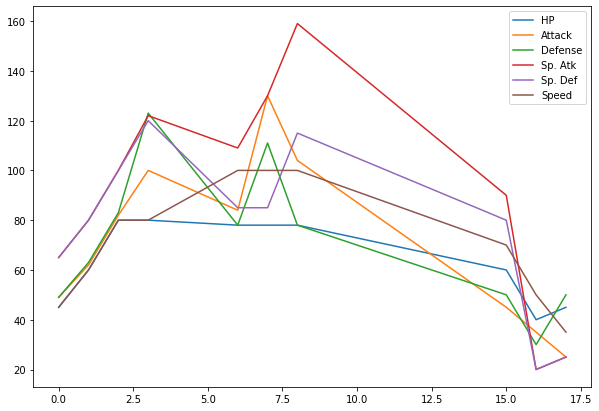

In [73]:
df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].head(10).plot()